In [2]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [19]:
adv = pd.DataFrame(pd.read_csv(r"D:/PowerBI_Projects/INTERNSHIP/Task_4/advertising.csv"))

In [5]:
adv.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


# Data Inspection

In [6]:
adv.shape

(200, 4)

In [7]:
adv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [8]:
adv.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


# Data Cleaning

In [9]:
adv.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

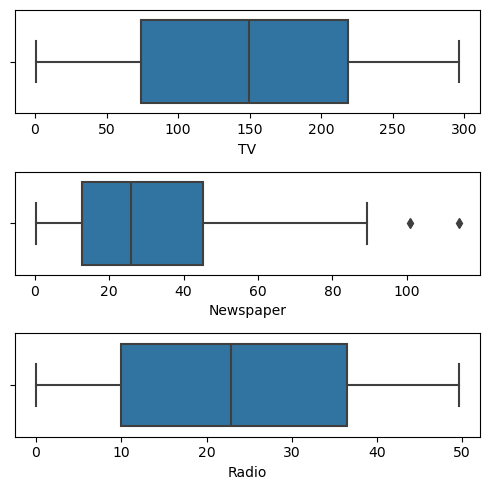

In [29]:

fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(x=adv['TV'], ax = axs[0])
plt2 = sns.boxplot(x=adv['Newspaper'], ax = axs[1])
plt3 = sns.boxplot(x=adv['Radio'], ax = axs[2])
plt.tight_layout()

# Exploratory Data Analysis


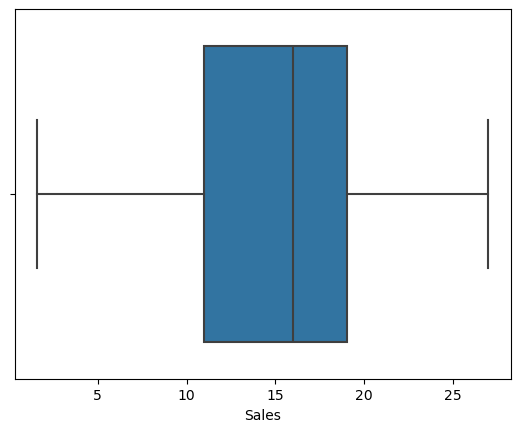

In [31]:
sns.boxplot(x= adv['Sales'])
plt.show()

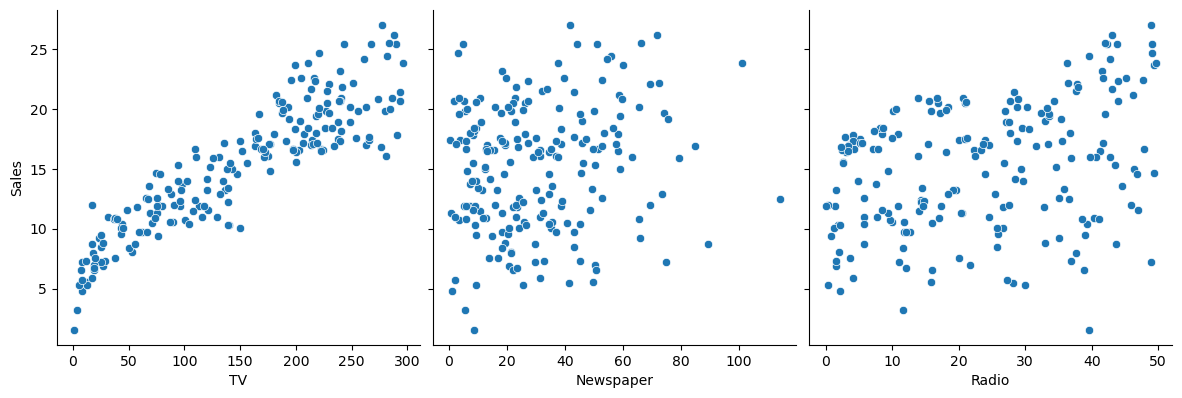

In [33]:
# Create a pairplot to show relationships between 'TV', 'Newspaper', 'Radio', and 'Sales'
sns.pairplot(adv, x_vars=['TV', 'Newspaper', 'Radio'], y_vars=['Sales'], height=4)

# Show the plot
plt.show()


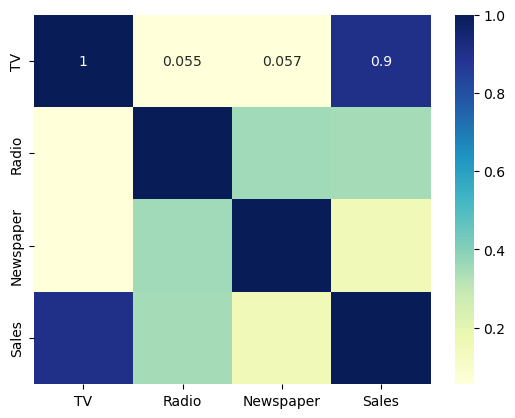

In [37]:
sns.heatmap(adv.corr(), cmap="YlGnBu", annot = True)
plt.show()

# Model Building


In [38]:
x = adv['TV']
y = adv['Sales']

In [39]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, test_size=0.3, random_state=42)


In [40]:
x_train.head()

169    284.3
97     184.9
31     112.9
12      23.8
35     290.7
Name: TV, dtype: float64

In [41]:
y_train.head()

169    20.0
97     20.5
31     11.9
12      9.2
35     17.8
Name: Sales, dtype: float64

# Building a Linear Model

In [42]:
import statsmodels.api as sm

In [43]:
x_train_sm = sm.add_constant(x_train)
lr = sm.OLS(y_train, x_train_sm).fit()


In [44]:
lr.params

const    7.206555
TV       0.054835
dtype: float64

In [45]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     550.7
Date:                Fri, 02 Aug 2024   Prob (F-statistic):           5.08e-50
Time:                        15:00:06   Log-Likelihood:                -314.94
No. Observations:                 140   AIC:                             633.9
Df Residuals:                     138   BIC:                             639.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.2066      0.414     17.392      0.0

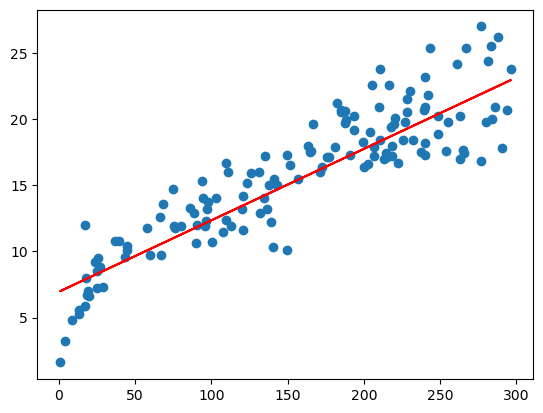

In [46]:
plt.scatter(x_train, y_train)
plt.plot(x_train, 6.948 + 0.054*x_train, 'r')
plt.show()

# Model Evaluation

In [47]:
y_train_pred = lr.predict(x_train_sm)
res = (y_train - y_train_pred)

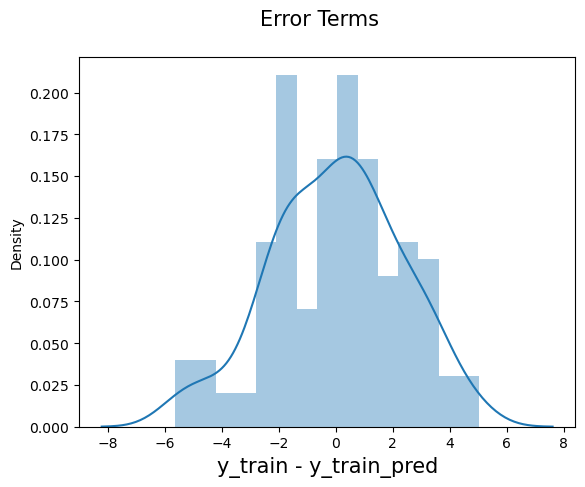

In [48]:

fig = plt.figure()
sns.distplot(res, bins=15)
fig.suptitle('Error Terms', fontsize = 15)
plt.xlabel('y_train - y_train_pred', fontsize = 15)
plt.show()

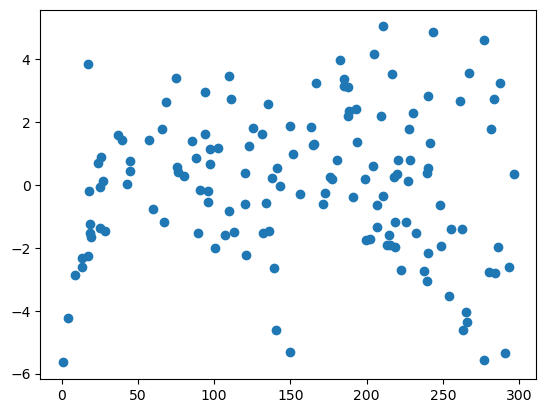

In [49]:

plt.scatter(x_train, res)
plt.show()

# Prediction on the Test Set

In [50]:
x_test_sm = sm.add_constant(x_test)
y_pred = lr.predict(x_test_sm)


In [51]:
y_pred.head()

95     16.161091
15     17.921291
30     23.267692
158     7.848123
128    19.286679
dtype: float64

In [52]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [53]:
np.sqrt(mean_squared_error(y_test, y_pred))

2.27585706980176

In [54]:
# Checking the R-squared on the test set
r_squared = r2_score(y_test, y_pred)
r_squared

0.814855389208679

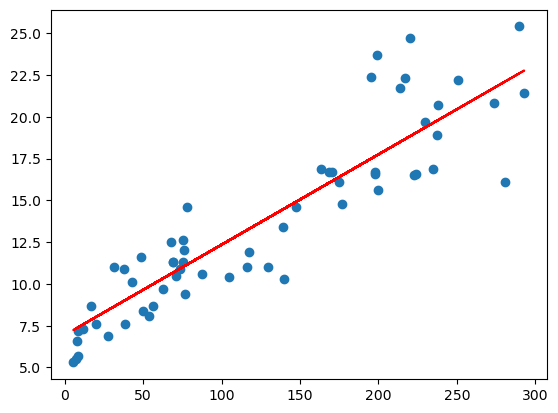

In [55]:
#Visvalizing the fit on the test set

plt.scatter(x_test, y_test)
plt.plot(x_test, 6.948 + 0.054 * x_test, 'r')
plt.show()